# ***Opening Act or Encore?***
## <span style="color:#83898b"> The Influence of Release Timing on Game Critiques </span> 
### <span style="color:#83898b"> (An Analysis of IGN Reviews) </span> 


#### Jacob Rempel (100823181)


# Introduction
In this report, the dataset to look at is a dataset of ign.com reviews on video games. Ign is a very popular gaming website for reviewing video games. Ign is generally favorable among consumers and consumers generally agree on the reviews published by the ign network. They have reviewed almost every video game that has come out in the past decade. This report aims to analyze the relationship of different data such as the genre, month, and platform a game was released on vs how well the game performed based on the reviews. If you were a game studio, does the time you release your game impact how well it does? This analysis will answer three questions:

1. Does the genre of game impact how well the reviews are?
2. Does the month in which the game was released impact how good the game was rated?
3. Does the game being released on console, impact it's reviews


![IGN_Logo](https://static1.squarespace.com/static/5a4e740c4c326d723144bf21/t/5a4ebe080852296d70939694/1700072677482/)

# **Data Collection and Cleaning** #
### imports and read in data

In [19]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
from matplotlib.colors import ListedColormap #custom cmaps


#get dataset
ign_data = pd.read_csv('ign.csv')

### Clean the data
Only NaN values are 36 NaN values in the genre column, since the dataset is huge, drop them.
The following columns are not needed: 
| column | explanation |
| ----------- | ----------- |
| editor's choice | any video game that scores really high (usually > 8) is a Y | 
| unamed: 0 | just an extra (un-needed) index |
| url | contains a link to the game |

In [20]:
ign_data.dropna(axis=0, inplace=True)
del ign_data["editors_choice"]
del ign_data["Unnamed: 0"]
del ign_data["url"]

#### Clean the genre's
There are multiple games that have 2 genres, represented as (genre1, genre2) to make the unique categories of genres significantly smaller, the genre after the comma is going to be removed. 

In [21]:
def deleteAfterComma(string: str): #deletes everything after the comma and
    return re.sub(",.*", "", string) #the comma itself

Only the genres that have more than 500 games in them should be looked at

In [22]:
#clean genres
clean_ign_data = ign_data
clean_ign_data["genre"] = ign_data["genre"].apply(deleteAfterComma)

#filter out a lot of genres that are < 500 
df_counts = pd.DataFrame(clean_ign_data['genre'].value_counts())
genre_to_remove = df_counts[df_counts["count"] > 500]

clean_ign_data = clean_ign_data[ign_data["genre"].isin(genre_to_remove.index.to_list())]

#remove duplicate games
clean_ign_data = clean_ign_data.drop_duplicates(subset=["title"])
clean_ign_data

#keep only certain consoles, for the console analysis we only want to look 
#at this generation because there is 59 total platforms
consoles_to_keep = ["PC", "Wii U", "Xbox One", "PlayStation 3", "Wii",
                    "PlayStation 4", "Xbox 360", "Macintosh", "Nintendo 3D", ]
console_ign_data = ign_data[ign_data["platform"].isin(consoles_to_keep)] ;

# **Analysis** #

#### Q1. Review Score vs Genre

The genres which got the best scores were looked at

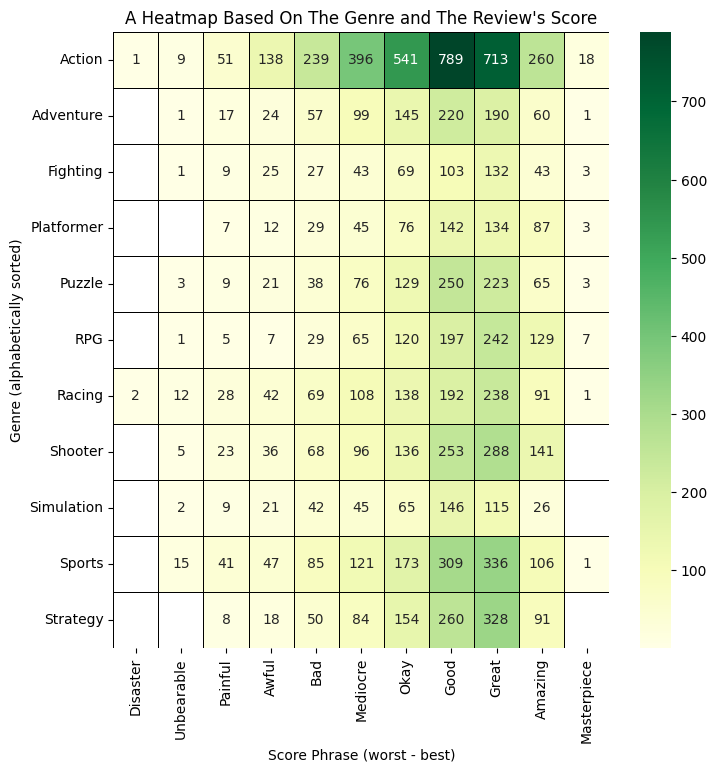

In [23]:
#group genre and score
group = clean_ign_data.groupby(["genre", "score_phrase"])

df_counts = group.size().unstack()
df_counts = df_counts.reindex(columns=["Disaster", "Unbearable", "Painful", "Awful", "Bad", "Mediocre", "Okay", "Good", "Great", "Amazing", "Masterpiece"])
plt.figure(figsize=(8, 8))
sns.heatmap(df_counts, cmap='YlGn', annot=True, fmt="n", linewidths=.5, linecolor="black", )
plt.title("A Heatmap Based On The Genre and The Review's Score")
plt.xlabel("Score Phrase (worst - best)")
plt.ylabel("Genre (alphabetically sorted)")
plt.show()


The category of the game may impact it's reviews, for example: a significant amount of action games were rated okay, good, and great, whereas shooter games tended to have more great reviews. One possible explanation of this is that the different genres of games may be rated differently. Continuing with the previous example, action games may be rated on how fun they are, whereas sports games may depend more on how realistic it is to the actual sport. To answer this question let's look at the distribution of reviews. 

##### Weighted bargraph, analyzing the distribution of reviews and genres ####

I came across a stacked bar graph, it may be a good alternative way to better represent the data from the heatmap. This way, the distribution of reviews can also be looked at.

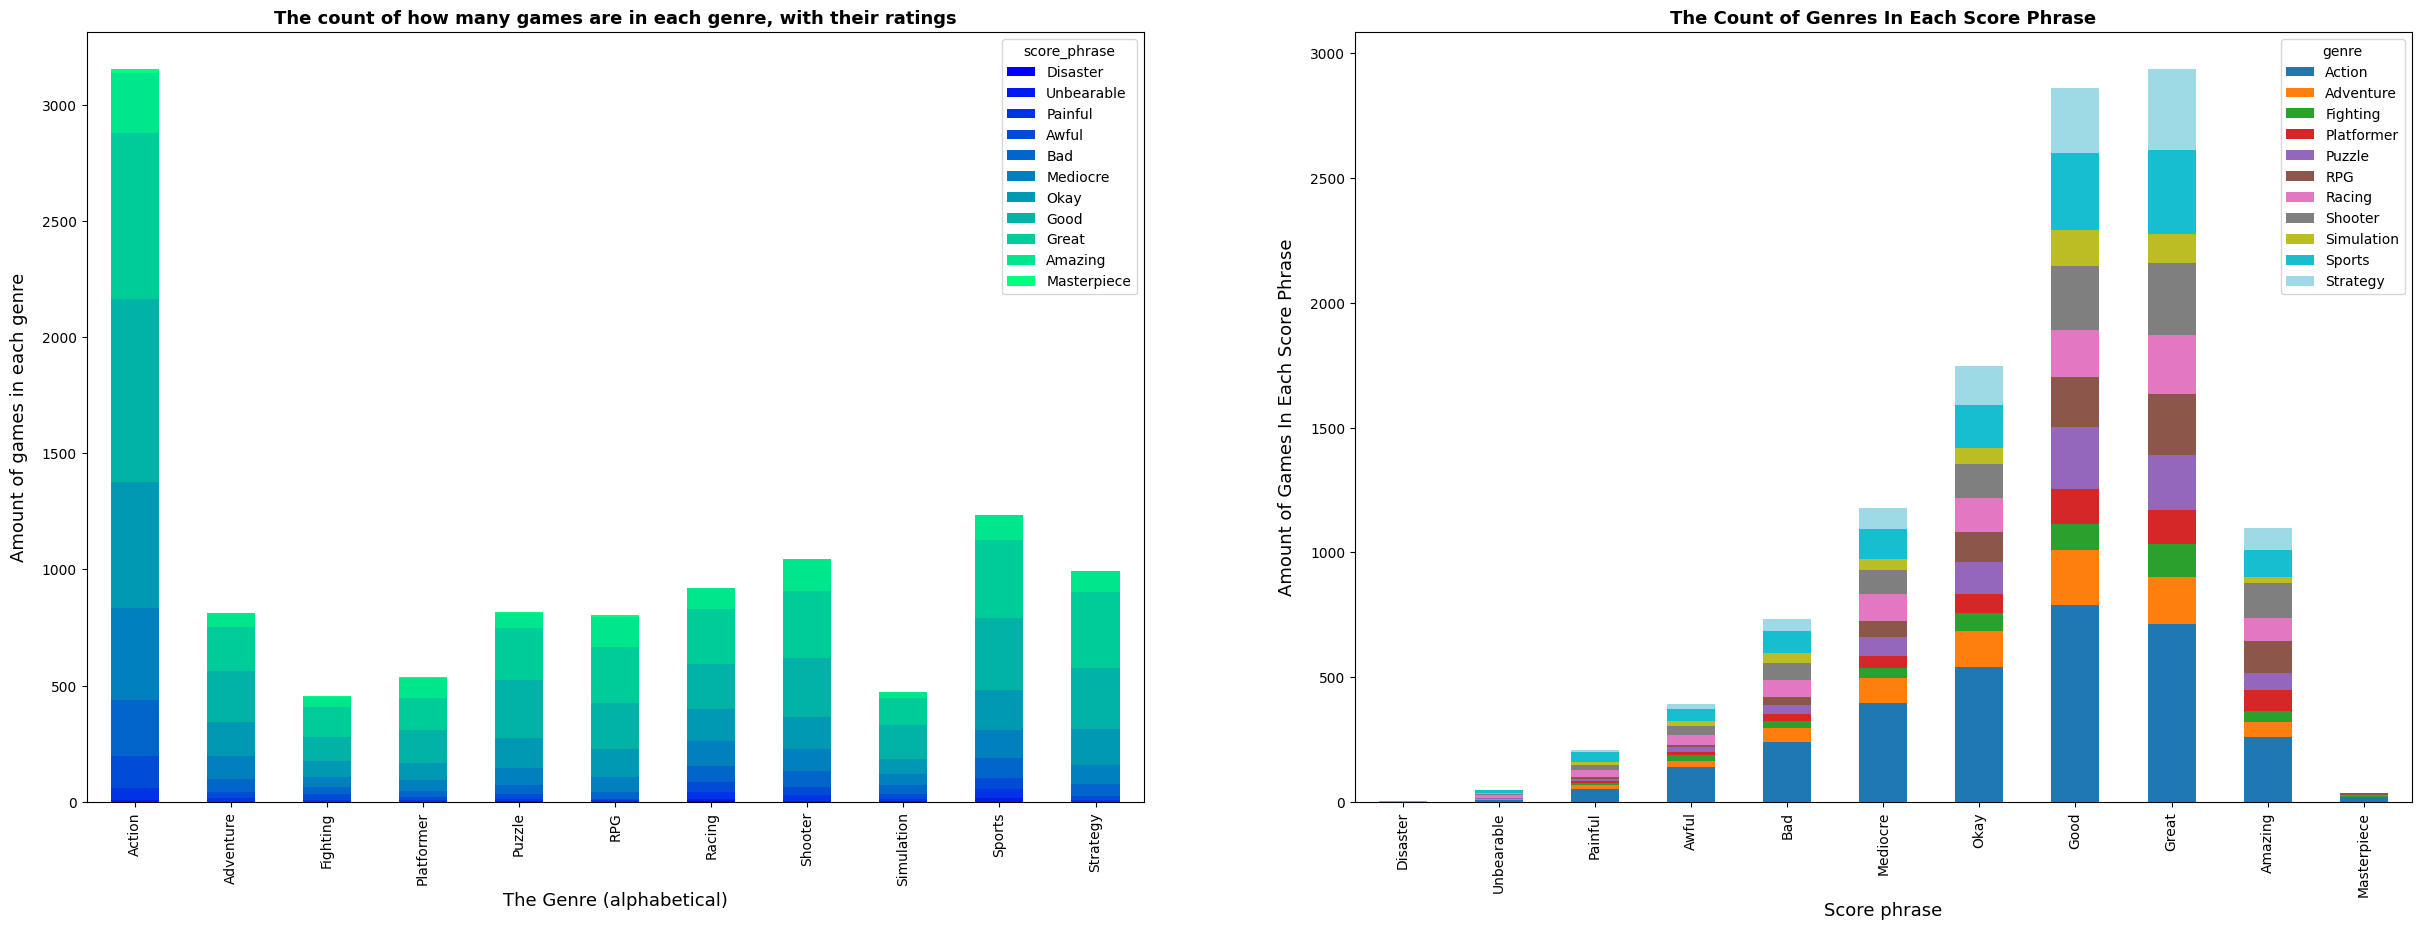

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10)) #2 plots to also plot the transpose
df_counts.plot(kind='bar', stacked=True, ax=axes[0], cmap='winter') #since these bars are sorted, use gradient
df_counts.T.plot(kind='bar', stacked=True, ax=axes[1], cmap='tab20')
axes[0].set_title("The count of how many games are in each genre, with their ratings", fontsize=13, fontweight="bold")
axes[0].set_xlabel("The Genre (alphabetical)", fontsize=13)
axes[0].set_ylabel("Amount of games in each genre", labelpad=10, fontsize=13)

axes[1].set_title("The Count of Genres In Each Score Phrase", fontsize=13, fontweight="bold")
axes[1].set_xlabel("Score phrase", fontsize=13)
axes[1].set_ylabel("Amount of Games In Each Score Phrase", labelpad=10, fontsize=13);

From the graph on the right, the genre does not impact what the score phrase used for the game is. There is approximately the same distribution of genres in bad as there is in great. (Moreover, there is an equal amount of blue bar in the great category as there is in the bad category). 

## Q2. Do games with higher scores come out in different seasons?

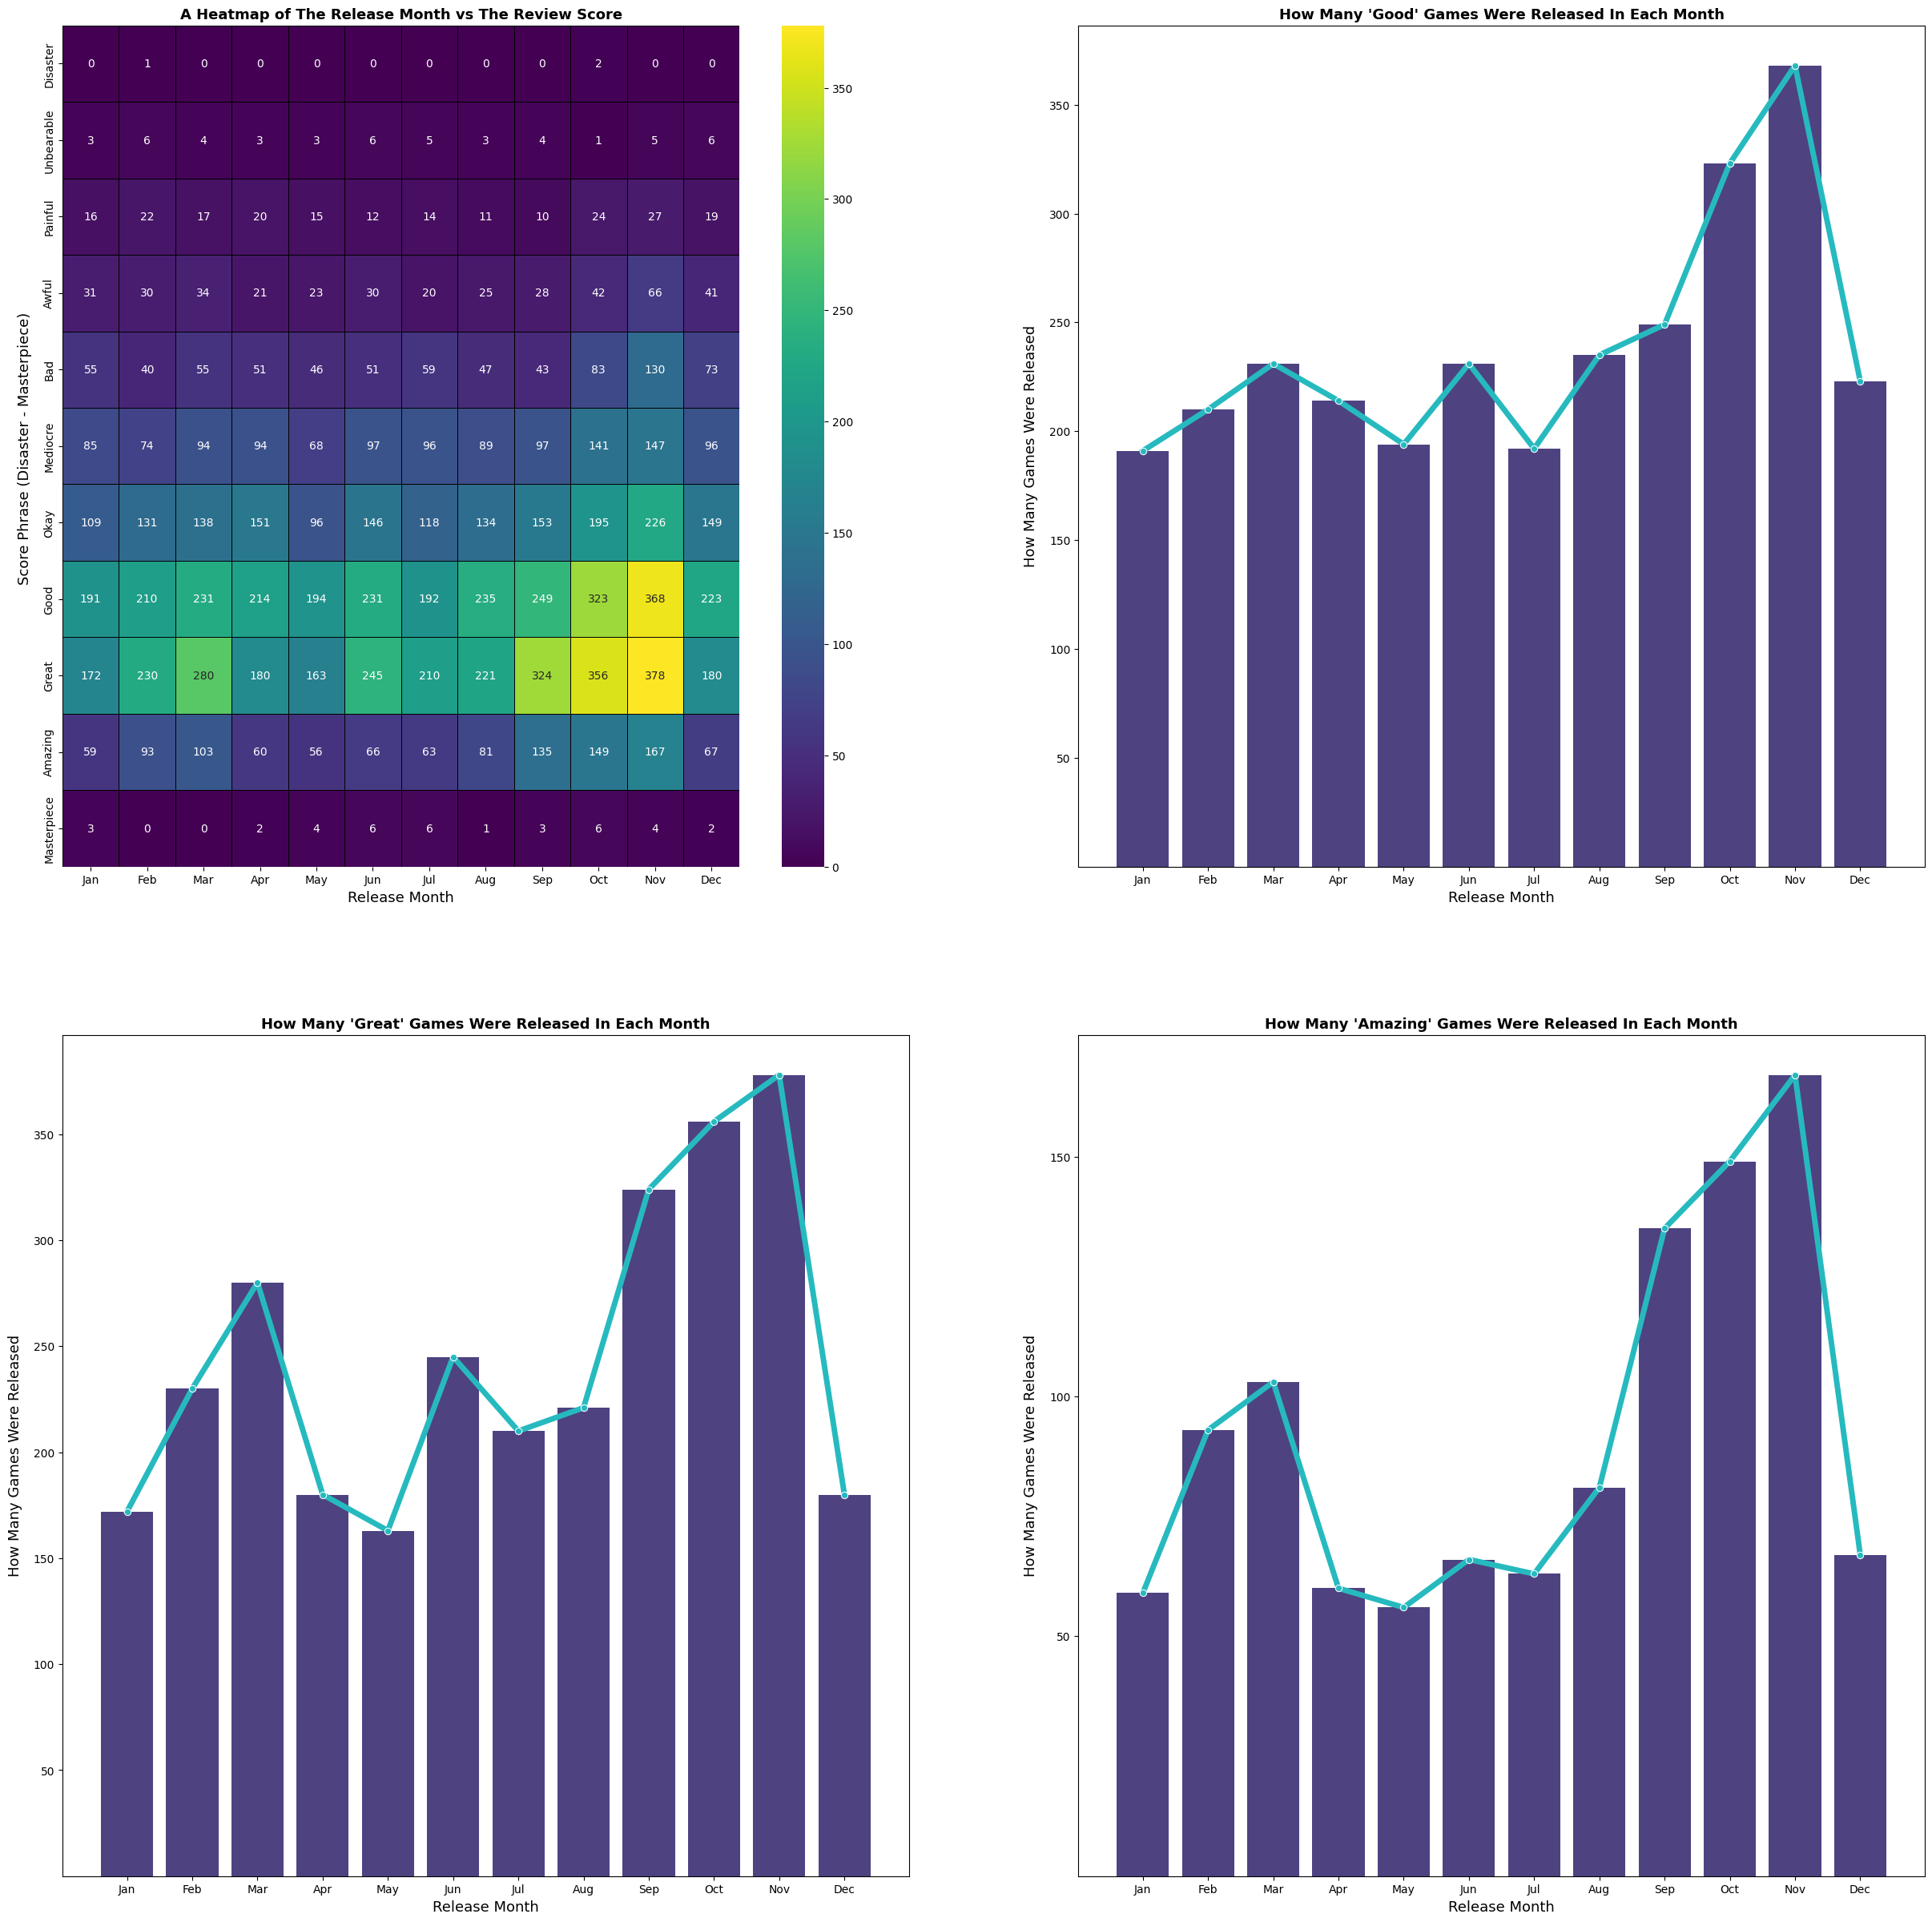

In [25]:
#I apologize for the large cell of code, all of this is to generate 4 graphs
#create 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(30, 30))

#get a count of how many scores were in each month
group = clean_ign_data.groupby(["release_month", "score_phrase"])
group = group.size().unstack().T
group = group.reindex(index=["Disaster", "Unbearable", "Painful", "Awful", "Bad",
                              "Mediocre", "Okay", "Good", "Great", "Amazing", "Masterpiece"])
group = group.fillna(0)
#create heatmap
sns.heatmap(group, cmap='viridis', annot=True, fmt="n", linewidths=.5, linecolor="black", ax=axes[0, 0])

#take a subset of the data
group = group.loc["Good":"Amazing", :] #take only Good, Great, Amazing rows

good = group.loc["Good", :] #look at all good rows
great = group.loc["Great", :]
amazing = group.loc["Amazing", :]

good = good.reset_index() #convert series back into dataframe, so we can plot it
great = great.reset_index()
amazing = amazing.reset_index()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i in [0,1]:
    for j in [0,1]:
        axes[i,j].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11]) #fixes warnings
        axes[i,j].set_xticklabels(months) 

#realign heatmap's x-labels
axes[0,0].set_xticks([.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5])
axes[0,0].set_xticklabels(months)

#set y-axis
axes[0,1].set_yticks([50, 100, 150, 200, 250, 300, 350])
axes[1,0].set_yticks([50, 100, 150, 200, 250, 300, 350])
axes[1,1].set_yticks([50, 100, 150, 200]) #highest value is <200 so the scale will be different


#when attempting to plot the 2 graphs in the same space, the lineplot was shifted
#over by 1 x-coord, to fix this, subtract 1 from all x coords.

#construct graphs
sns.barplot(data=good, x="release_month", y="Good", ax=axes[0,1], color='#48378c')
#just writing x="release__month" gives us a string
#for the next x-data, we have to access the numerical values so we can subtract 1
sns.lineplot(data=good, x=good["release_month"] - 1, y="Good", marker='o', color='#26babf', ax=axes[0,1], lw=5)

#plot the rest:
sns.barplot(data=great, x="release_month", y="Great", ax=axes[1,0], color="#48378c")
sns.lineplot(data=great, x=great["release_month"] - 1, y="Great", marker='o', color='#26babf', ax=axes[1,0], lw=5)

sns.barplot(data=amazing, x="release_month", y="Amazing", ax=axes[1,1], color="#48378c")
sns.lineplot(data=amazing, x=amazing["release_month"] - 1, y="Amazing", marker='o', color='#26babf', ax=axes[1,1], lw=5) 

#set misc. attributes
axes[0,0].set_title("A Heatmap of The Release Month vs The Review Score", fontsize=13, fontweight="bold")
axes[0,0].set_xlabel("Release Month", fontsize=13)
axes[0,0].set_ylabel("Score Phrase (Disaster - Masterpiece) ", labelpad=10, fontsize=13) 

axes[0,1].set_title("How Many 'Good' Games Were Released In Each Month", fontsize=13, fontweight="bold")
axes[0,1].set_xlabel("Release Month", fontsize=13)
axes[0,1].set_ylabel("How Many Games Were Released", labelpad=10, fontsize=13)

axes[1,0].set_title("How Many 'Great' Games Were Released In Each Month", fontsize=13, fontweight="bold")
axes[1,0].set_xlabel("Release Month", fontsize=13)
axes[1,0].set_ylabel("How Many Games Were Released", labelpad=10, fontsize=13) 

axes[1,1].set_title("How Many 'Amazing' Games Were Released In Each Month", fontsize=13, fontweight="bold")
axes[1,1].set_xlabel("Release Month", fontsize=13)
axes[1,1].set_ylabel("How Many Games Were Released", labelpad=10, fontsize=13) ;

Looking at the heatmap and the three graphs, in Sept, Oct, Nov, there are signifcantly more games released. As a consumer, I theorized why this is the case. It quickly became apparent that these are around the holiday season. Although, my original question of do games that come out at different times have higher or lower scores, I accidently proved that many companies release their games around the holiday season. As an avid consumer for many years, I definately buy more games around the holiday season, so I would personally support this theory.

### Games by console, whether being released on a console is better

## Q3. Does the game being released on console, impact it's reviews

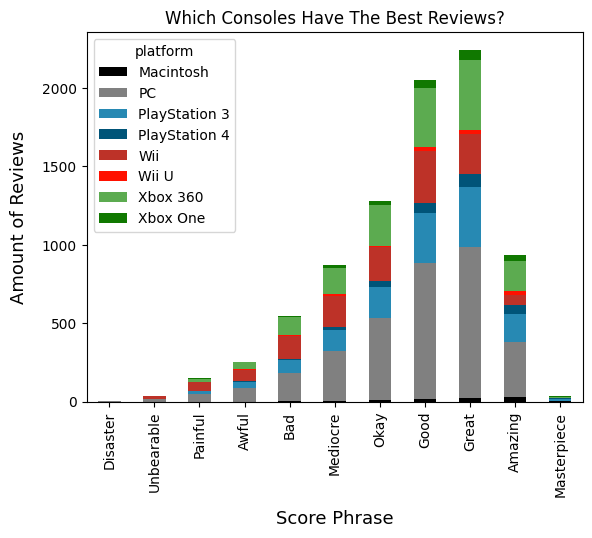

In [26]:
group = console_ign_data.groupby(["score_phrase", "platform" ])
group = group.size().unstack()
group = group.reindex(index=["Disaster", "Unbearable", "Painful", "Awful", "Bad", "Mediocre", "Okay", "Good", "Great", "Amazing", "Masterpiece"])
group = group.fillna(0)
#you can define custom cmaps:
          #Mac,      PC,      ps3,        ps4,        wii,     wiiu,     xbox360,  xbox one
colors = ['black', 'grey', '#2789b3', '#005478' , '#bd3228', '#ff1100', '#5cab50', '#107800']
custom_cmap = ListedColormap(colors)

#displayed by console, and the consoles are coloured based on their logos
ax = group.plot(kind='bar', stacked=True, cmap=custom_cmap)
ax.set_title("Which Consoles Have The Best Reviews?")
ax.set_xlabel("Score Phrase", labelpad=10, fontsize=13)
ax.set_ylabel("Amount of Reviews", labelpad=10, fontsize=13);

Based on the produced graph, unfortunately, there appears to be no correlation between if the game does better on console or not. An interesting statistic that can be discerned from this graph is that any game released on the Macintosh, does very well according to IGN. One possible explanation is that only good games are ported over to the Macintosh, because it would be very inefficient (time and money wise) to port over a bad game. This graph also proves that game reviews / scores follow this left-skewed distribution. 

The following graph is a quick exploration on the mean scores for each platform

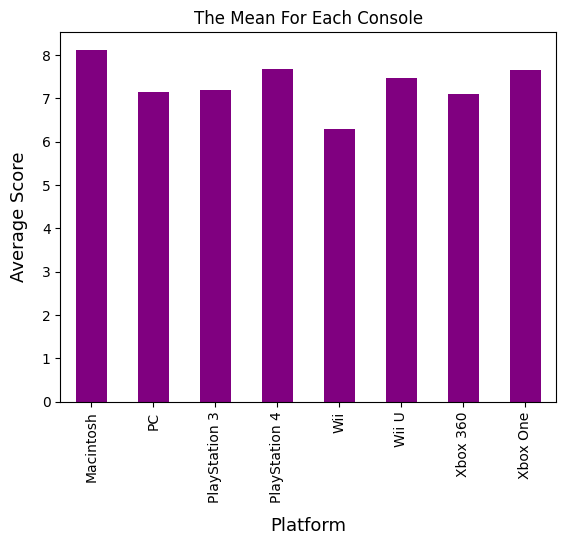

In [27]:
#use console_ign_data here because we need the duplicates and the earlier data cleaning
#only applied to genres 
group_mean = console_ign_data.groupby("platform")["score"]
ax = group_mean.mean().plot(kind='bar', color='purple')
ax.set_title("The Mean For Each Console")
ax.set_xlabel("Platform", labelpad=10, fontsize=13)
ax.set_ylabel("Average Score", labelpad=10, fontsize=13);

This graph does prove that the best games are released on Macintosh, it being the platform with the highest average score.

## Conclusion

This report set out to answer three questions: 
1. Does the genre of game impact how well the reviews are?
2. Does the month in which the game was released in, impact how good the game was rated?
3. Does the game being released on console, impact it's reviews

Unfortunately the answer to all of these questions is that there is little to no correlation. 
1. The genre of the game does not impact how good the reviews are.
2. The month in which the game is released does not impact how good the game's reviews are.
3. The game being released on console does impact its reviews. It was found that when a game is released on Macintosh, it has a higher average number of reviews then every other console.

However, in finding the answers to these questions, interesting results were produced. It was found that game reviews by IGN tend to follow the distribution seen above (left skewed distribution with results clustering around 'good' and 'great'). This is most likely due to the fact that developers try to make their game as good as possible so it sells well. The other very interesting conclusion to draw from this dataset is that games released on Macintosh tend to do very well. This is because it is very costly to port the game over to Mac, so only the best games are ported over.

## References:

IGN Dataset from Kaggle <br>
https://www.kaggle.com/datasets/joebeachcapital/ign-games <br> <br>
How to guide on stacked bar plots: <br>
https://www.educba.com/seaborn-stacked-bar-plot/ <br> <br>
Seaborn documentation for the heatmap: <br>
https://seaborn.pydata.org/generated/seaborn.heatmap. <br> <br>
Matplotlib documentation for the custom cmap: <br> 
https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html <br> <br>

The image was provided by "ign.com" <br> <br>

### Libraries Used: <br>
Pandas for data proccessing <br>
Matplotlib for data vizualization <br>
Seaborn for data vizualization <br>